In [ ]:
import thin_section_rock_analysis as ts
from thin_section_rock_analysis.machine_learning.network.architecture import SimCLR
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import callbacks, layers, losses, optimizers
import keras_cv
import numpy as np
import seaborn as sns
sns.set_context('notebook')
from thin_section_rock_analysis.plotting.augmentation import plot_single_image, plot_augmented_images


ModuleNotFoundError: No module named 'thin_section_rock_analysis'

I0000 00:00:1727079774.124947  387906 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727079774.168903  387906 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727079774.169080  387906 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727079774.170026  387906 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

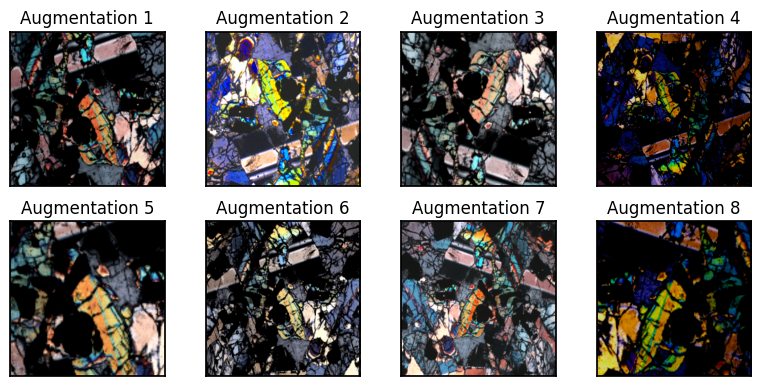

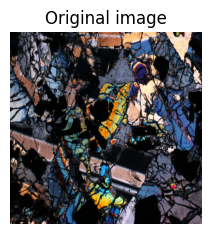

In [ ]:
def get_train_ds():
    training_directory = "../../0_data/binary/train"
    validation_directory = "../../0_data/binary/validation"
    all_training = "../../0_data/binary/all_training"
    test_directory = "../../0_data/binary/test"

    network = SimCLR(path="2_contrastive_learning/models/pretrained_r50_1x_sk0/", learning_rate=0.1, momentum=0.9, weight_decay=0., train_dir=training_directory, val_dir=validation_directory, test_dir=test_directory,
                                epochs=20, finetune_epochs=30, batch_size=8)

    train_ds, valid_ds, class_weights = network.fetch_for_train()
    return train_ds

def get_images_from_ds(ds):
    for data_batch in ds.take(1):
        im, labels = data_batch
    return im, labels

contrast_transformer = tf.keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomFlip("vertical"),
            #layers.RandomCrop(height=96, width=96),
            layers.RandomZoom(height_factor=(-0.7, 0.)),  # Randomly zoom in or out            
            layers.Resizing(height=299, width=299),
            layers.RandomBrightness(factor=0.3, value_range=(0, 255)),  # brightness
            layers.RandomContrast(factor=0.3),  # contrast
            keras_cv.layers.RandomSaturation(factor=(0.3, 0.7)),  # saturation
            keras_cv.layers.RandomHue(factor=0.1, value_range=(0, 255)),  # hue
            #layers.Normalization(mean=(0.5), variance=(0.5)),
            layers.Rescaling(1./255),  # Convert to [0, 1] range
        ])

ds = get_train_ds()
im, labels = get_images_from_ds(ds)
# np.save('example_image.npy', np.array(im[1]/255))

images = []
for i in range(0,8):
    images.append(contrast_transformer(im[1:2])[0])
# np.save('example_aug_images.npy', np.array(images))
#aug_images = np.load("example_aug_images.npy")
#image = np.load("example_image.npy")

image =  np.array(im[1]/255)
aug_images = np.array(images)
plot_augmented_images(aug_images)
plot_single_image(image)
